In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader,random_split

In [5]:
train=pd.read_csv("../data/train.csv.zip")
test=pd.read_csv("../data/test.csv.zip")

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [9]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [10]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
train.isna().sum(),train.isnull().sum(),train.duplicated().sum()

(label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64,
 label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64,
 0)

In [12]:
X=train.drop(columns=['label']).values
y=train.label.values
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([1, 0, 1, ..., 7, 6, 9], dtype=int64))

In [13]:
X.shape,y.shape

((42000, 784), (42000,))

In [14]:
tensor_X=torch.tensor(X/255,dtype=torch.float32)
tensor_y=torch.tensor(y,dtype=torch.long)
tensor_test=torch.tensor(test.values/255,dtype=torch.float32)
tensor_X,tensor_y,tensor_test,tensor_X.shape,tensor_y.shape,tensor_test.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([1, 0, 1,  ..., 7, 6, 9]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([42000, 784]),
 torch.Size([42000]),
 torch.Size([28000, 784]))

In [15]:
tensor_X=tensor_X.view(-1,1,28,28)
tensor_test=tensor_test.view(-1,1,28,28)
tensor_X,tensor_test,tensor_X.shape,tensor_test.shape

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

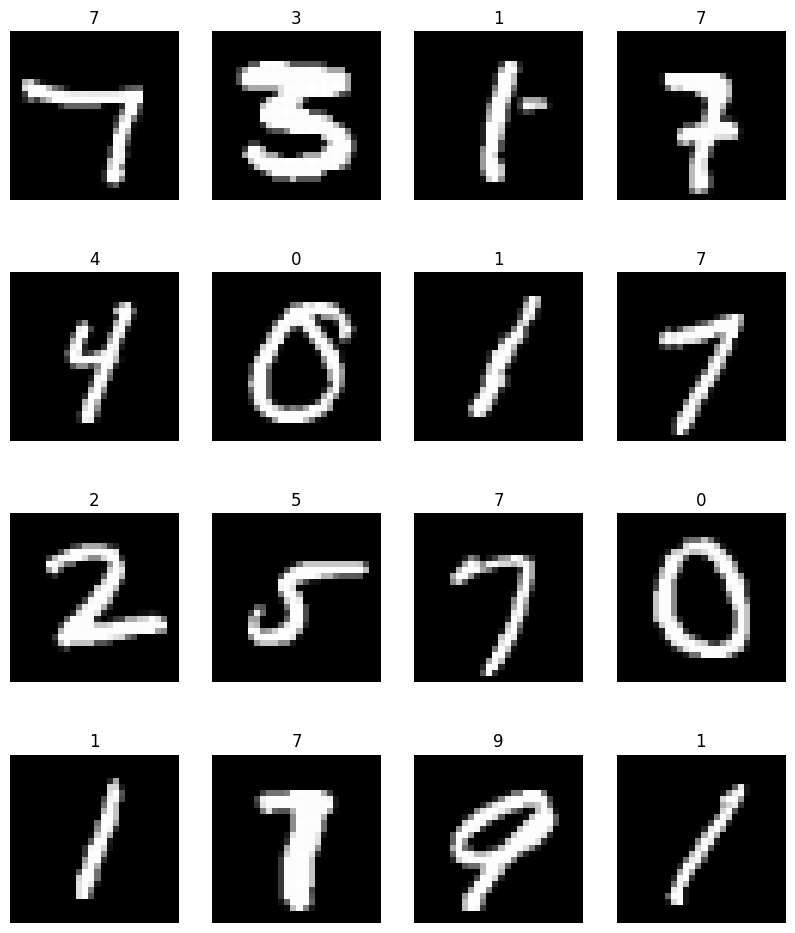

In [16]:
torch.manual_seed(42)
fig=plt.figure(figsize=(10,12))
for i in range(1,17):
    ridx=torch.randint(1,len(train),size=[1]).item()
    img=tensor_X[ridx]
    label=tensor_y[ridx]
    fig.add_subplot(4,4,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(f"{label}")
    plt.axis('off')

In [17]:
dataset=TensorDataset(tensor_X,tensor_y)
train_size=int(0.8*len(train))
val_size=len(train)-train_size
train_dataset,val_dataset=random_split(dataset,[train_size,val_size])
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
val_dataloader=DataLoader(val_dataset,batch_size=32,shuffle=False)

In [18]:
class DigitRecogniser(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.layers2=nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*7*7,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,10)
        )
    def forward(self,x):
        x=self.layers1(x)
        x=self.layers2(x)
        return x

In [19]:
device="cuda" if torch.cuda.is_available() else "cpu"
model2=DigitRecogniser().to(device)
loss_fn=nn.CrossEntropyLoss(label_smoothing=0.1)
optimiser=torch.optim.Adam(params=model2.parameters(),lr=0.001)
scheduler=torch.optim.lr_scheduler.StepLR(optimiser,step_size=5,gamma=0.5)

In [20]:
epochs=25
for epoch in range(epochs):
    train_loss=0
    correct=0
    total=0
    model2.train()
    for batch,(img,label) in enumerate(train_dataloader):
        img,label=img.to(device),label.to(device)
        y_pred=model2(img)
        loss=loss_fn(y_pred,label)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        train_loss+=loss.item()
        preds=torch.argmax(y_pred,dim=1)
        correct+=(preds==label).sum().item()
        total+=label.size(0)
        if(batch%400==0):
            print(f"looked at {batch*len(img)}/{len(train_dataloader.dataset)} samples")
    scheduler.step()
    print(f"epoch: {epoch} | train loss: {train_loss/len(train_dataloader)} | accuracy: {correct/total*100}")
    model2.eval()
    val_loss=0
    correct=0
    total=0
    with torch.inference_mode():
        for(img,label) in val_dataloader:
            img,label=img.to(device),label.to(device)
            val_pred=model2(img)
            loss=loss_fn(val_pred,label)
            val_loss+=loss.item()
            preds=torch.argmax(val_pred,dim=1)
            correct+=(preds==label).sum().item()
            total+=label.size(0)
        print(f"validation loss: {val_loss/len(val_dataloader)} | validation accuracy: {correct/total*100}")

looked at 0/33600 samples
looked at 12800/33600 samples
looked at 25600/33600 samples
epoch: 0 | train loss: 0.6904723501773108 | accuracy: 95.76190476190476
validation loss: 0.5738059706107745 | validation accuracy: 98.53571428571428
looked at 0/33600 samples
looked at 12800/33600 samples
looked at 25600/33600 samples
epoch: 1 | train loss: 0.5992341977074033 | accuracy: 98.77083333333333
validation loss: 0.565912343929929 | validation accuracy: 98.61904761904762
looked at 0/33600 samples
looked at 12800/33600 samples
looked at 25600/33600 samples
epoch: 2 | train loss: 0.5823266041846502 | accuracy: 99.13690476190476
validation loss: 0.5543015352220136 | validation accuracy: 98.8452380952381
looked at 0/33600 samples
looked at 12800/33600 samples
looked at 25600/33600 samples
epoch: 3 | train loss: 0.5728708631651742 | accuracy: 99.3125
validation loss: 0.545739567551776 | validation accuracy: 98.98809523809524
looked at 0/33600 samples
looked at 12800/33600 samples
looked at 25600/3

In [21]:
model2.eval()
prediction=[]
with torch.no_grad():
    for img in tensor_test.to(device):
        
        img=img.unsqueeze(0)
        pred=model2(img)
        pred_label=torch.argmax(pred,dim=1).item()
        prediction.append(pred_label)
submission=pd.DataFrame({
    'ImageId': np.arange(1,len(test)+1),
    'Label': prediction
})
submission.to_csv("../predictions/predictions.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
